# Harmonization across studies with PIC-SURE

This tutorial notebook will demonstrate how to query and work with the BioData Catalyst studies, particularly cross-study harmonization. For a more step-by-step introduction to the python PIC-SURE API, see the `1_PICSURE_API_101.ipynb` notebook.

**Before running this notebook, please be sure to review the \"Get your security token\" documentation, which exists in the NHLBI_BioData_Catalyst [README.md file](https://github.com/hms-dbmi/Access-to-Data-using-PIC-SURE-API/tree/master/NHLBI_BioData_Catalyst#get-your-security-token). It explains about how to get a security token, which is mandatory to access the databases.**

-----

# Environment set-up

### Pre-requisites
- R 3.4 or later


### Install packages
Install the following:
- packages listed in the `requirements.R` file
- PIC-SURE API components (from Github)
    - PIC-SURE Adapter
    - PIC-SURE Client

In [1]:
source("R_lib/requirements.R")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



installing: 
-  ggplot2 
-  dplyr 
-  tidyr 
-  urltools 
-  devtools 
-  ggrepel 


also installing the dependencies ‘systemfonts’, ‘textshaping’, ‘ragg’, ‘pkgdown’


Warning message in install.packages(package, dependencies = TRUE):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages(package, dependencies = TRUE):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(package, dependencies = TRUE):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages(package, dependencies = TRUE):
“installation of package ‘pkgdown’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: usethis



In [2]:
Sys.setenv(TAR = "/bin/tar")
options(unzip = "internal")
install.packages("https://cran.r-project.org/src/contrib/Archive/devtools/devtools_1.13.6.tar.gz", repos=NULL, type="source")
install.packages("https://cran.r-project.org/src/contrib/R6_2.5.1.tar.gz", repos=NULL, type="source")
install.packages("https://cran.r-project.org/src/contrib/hash_2.2.6.1.tar.gz", repos=NULL, type="source")
install.packages(c("urltools"),repos = "http://cran.us.r-project.org")
devtools::install_github("hms-dbmi/pic-sure-r-client", force=T)
devtools::install_github("hms-dbmi/pic-sure-r-adapter-hpds", force=T)
devtools::install_github("hms-dbmi/pic-sure-biodatacatalyst-r-adapter-hpds", force=T)

Warning message in install.packages("https://cran.r-project.org/src/contrib/Archive/devtools/devtools_1.13.6.tar.gz", :
“installation of package ‘/tmp/Rtmpsew0pr/downloaded_packages/devtools_1.13.6.tar.gz’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done





✔  checking for file ‘/tmp/Rtmpsew0pr/remotes18fc4e097a53/hms-dbmi-pic-sure-r-client-115deb5/DESCRIPTION’
─  preparing ‘picsure’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘picsure_0.1.0.tar.gz’
   



✔  checking for file ‘/tmp/Rtmpsew0pr/remotes18fc5b2f485a/hms-dbmi-pic-sure-r-adapter-hpds-2cee5ee/DESCRIPTION’
─  preparing ‘hpds’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘hpds_0.1.1.tar.gz’
   



✔  checking for file ‘/tmp/Rtmpsew0pr/remotes18fc56a4e567/hms-dbmi-pic-sure-biodatacatalyst-r-adapter-hpds-d019468/DESCRIPTION’
─  preparing ‘bdc’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘bdc_0.1.0.tar.gz’
   


##### Loading user-defined functions

In [3]:
source("R_lib/utils.R")

## Connecting to a PIC-SURE resource

In [4]:
PICSURE_network_URL <- "https://picsure.biodatacatalyst.nhlbi.nih.gov/picsure"
resource_id <- "02e23f52-f354-4e8b-992c-d37c8b9ba140"
token_file <- "token.txt"

In [5]:
token <- scan(token_file, what = "character")

In [6]:
connection <- picsure::connect(url = PICSURE_network_URL,
                                 token = token)
resource <- bdc::get.resource(connection,
                               resourceUUID = resource_id)

[1] "02e23f52-f354-4e8b-992c-d37c8b9ba140"
[2] "70c837be-5ffc-11eb-ae93-0242ac130002"
[1] "Loading data dictionary... (takes a minute)"


-----

## Harmonizing variables with PIC-SURE
One of the key challenges to conducting analyses with several studies is ensuring correct data harmonization, or combining of data from different sources. There are many harmonization techniques, but this notebook will demonstrate how to find and extract similar variables from different studies in PIC-SURE. Two examples of this will be shown:
1. Retrieving variables for *sex and gender* across studies with BMI
2. Harmonizing the variable *"orthopnea"* across studies with age


*For more information about the TOPMed DCC Harmonized Data Set in PIC-SURE, please refer to the [`2_TOPMed_DCC_Harmonized_Variables_analysis.ipynb`](https://github.com/hms-dbmi/Access-to-Data-using-PIC-SURE-API/blob/master/NHLBI_BioData_Catalyst/R/2_TOPMed_DCC_Harmonized_Variables_analysis.ipynb) notebook*

-----

### Sex and gender variables across studies

Let's start by doing separate searches for `sex` and `gender` to gain a better understanding of the variables that exist in PIC-SURE with these terms.

In [7]:
full_dict <- bdc::find.in.dictionary(resource) %>%
    bdc::extract.entries()
full_multiindex_dict <- get_multiIndex_variablesDict(full_dict)

In [8]:
sex_mask <- full_multiindex_dict$simplified_name[str_detect(full_multiindex_dict$simplified_name, 'sex')]
sex <- full_multiindex_dict[full_multiindex_dict$simplified_name %in% sex_mask,]
gender_mask <- full_multiindex_dict$simplified_name[str_detect(full_multiindex_dict$simplified_name, 'gender')]
gender <- full_multiindex_dict[full_multiindex_dict$simplified_name %in% gender_mask,]

In [9]:
# Uncomment the following lines of code to preview the filtered dataframes
#head(sex)
#head(gender)

After reviewing the variables using the dataframe (or the [user interface](https://picsure.biodatacatalyst.nhlbi.nih.gov/psamaui/login)), let's say we are interested in sex/gender variables from the following studies:
- TOPMed Harmonized data set
- ECLIPSE (Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints)
- EOCOPD (Early Onset of COPD)

However, these concept paths are labelled differently for each of these studies. For example, some use the keyword `sex` while others use `gender`. To acccount for these differences, we need to develop a way to search for multiple keywords at once.

First, let's get all of the concept paths associated with each study.

In [10]:
topmed_harmonized <- bdc::find.in.dictionary(resource, 'DCC Harmonized data set') %>%
    bdc::extract.entries()
eclipse <- bdc::find.in.dictionary(resource, 'Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints (ECLIPSE)') %>%
    bdc::extract.entries()
eocopd <- bdc::find.in.dictionary(resource, 'NHLBI TOPMed: Boston Early-Onset COPD Study') %>%
    bdc::extract.entries()

Now we will search for the terms of interest (`sex` and `gender`) and filter out these concept paths.

Below is a simple user-defined function that you could use to accomplish this.

In [12]:
# Function that filters out variables from a dataframe (df) that contain any of the terms (list_of_terms)
find_vars <- function(df, list_of_terms){
    if(length(list_of_terms)>1){
        pattern <- paste(list_of_terms, collapse='|')
    } else {
        pattern <- list_of_terms
    }
    pattern <- paste(c('(', pattern, ')'), collapse = '')
    df_filtered <- df %>%
        filter(grepl(pattern, name, ignore.case=TRUE))
    vars_list <- list(df_filtered$name)[[1]]
    return(vars_list)
}

In [13]:
# Search for 'sex' and 'gender' variables in TOPMed Harmonized dataset
topmed_var <- find_vars(topmed_harmonized, c('sex', 'gender'))
print(c("Concept path from TOPMed Harmonized data set:", topmed_var))

[1] "Concept path from TOPMed Harmonized data set:"                                         
[2] "\\DCC Harmonized data set\\01 - Demographics\\Subject sex  as recorded by the study.\\"


In [14]:
# Search for 'sex' and 'gender' variables in ECLIPSE dataset
eclipse_var <- find_vars(eclipse, c('sex', 'gender'))
print(c("Concept path from ECLIPSE data set:", eclipse_var))

[1] "Concept path from ECLIPSE data set:"                                                                          
[2] "\\Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints (ECLIPSE) ( phs001252 )\\Sex\\"


In [15]:
# Search for 'sex' and 'gender' variables in EOCOPD dataset
eocopd_vars <- find_vars(eocopd, c('sex', 'gender'))
print(c("Number of concept paths from EOCOPD data set:", length(eocopd_vars)))

[1] "Number of concept paths from EOCOPD data set:"
[2] "14"                                           


Since there are multiple concept paths that are contain either `gender` or `sex` in the EOCOPD dataset, we can investigate these concept paths to determine the true variable of interest.

In [16]:
# Uncomment the following line to see full list of sex/gender variables in EOCOPD
#print(c("Full list of variables", eocopd_vars))

# Based on this, we can see that the variable we want for this analysis is the last in the list: Gender of participant
eocopd_var <- find_vars(eocopd, c('gender of participant'))
print(c("Concept path from EOCOPD data set:", eocopd_var))

[1] "Concept path from EOCOPD data set:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
[2] "\\NHLBI TOPMed: Boston Early-Onset COPD Study ( phs000946 )\\Subject ID, subject age, gender, race, height, weight, BMI, age at sample collection, pregnancy, number of cigarettes per day, current or former smoker, and packs of cigarettes smoked per day multiplied by years of participants with early onset COPD and their pedigree and involved in the 'Boston Early-Onset COPD Study in the National Heart, Lung, and Blood Institute (NHLBI) Trans-Omics

As part of our research, let's also say we are interested in body mass index (BMI) measurements across these studies. Let's save these concept paths to use in our queries as well.

In [17]:
topmed_bmi <- find_vars(topmed_harmonized, c('body mass index'))
print(topmed_bmi)
eclipse_bmi <- find_vars(eclipse, c('body mass index'))
print(eclipse_bmi)
eocopd_bmi <- find_vars(eocopd, c('body mass index'))
print(eocopd_bmi)

[1] "\\DCC Harmonized data set\\03 - Baseline common covariates\\Body mass index calculated at baseline.\\"
[1] "\\Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints (ECLIPSE) ( phs001252 )\\Body mass index (kg/m2)\\"
[1] "\\NHLBI TOPMed: Boston Early-Onset COPD Study ( phs000946 )\\Subject ID, subject age, gender, race, height, weight, BMI, age at sample collection, pregnancy, number of cigarettes per day, current or former smoker, and packs of cigarettes smoked per day multiplied by years of participants with early onset COPD and their pedigree and involved in the 'Boston Early-Onset COPD Study in the National Heart, Lung, and Blood Institute (NHLBI) Trans-Omics for Precision Medicine (TOPMed) Program' project.\\Body Mass Index [BMI ]\\"


Now that we know and have saved our concept paths of interest, we can use these to build our query. 

**Note: queries with the TOPMed DCC Harmonized data set cannot be combined with concept paths from other datasets. Because of this, we will run separate queries and combine the dataframes.**

In [18]:
# Initialize a query
eclipse_query <- bdc::new.query(resource = resource)
# Build query using these concept paths
bdc::query.anyof.add(query = eclipse_query,
                     keys = eclipse_var)
bdc::query.anyof.add(query = eclipse_query,
                     keys = eclipse_bmi)

In [19]:
# Check results
eclipse_results <- bdc::query.run(eclipse_query, result.type = 'dataframe')
head(eclipse_results)

,Patient ID,\Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints (ECLIPSE) ( phs001252 )\Body mass index (kg/m2)\,\Evaluation of COPD Longitudinally to Identify Predictive Surrogate Endpoints (ECLIPSE) ( phs001252 )\Sex\,\_Parent Study Accession with Subject ID\,\_Topmed Study Accession with Subject ID\,\_consents\
,<int>,<dbl>,<chr>,<chr>,<lgl>,<chr>
1,34717,25.23634,Female,phs001252.v1_ecl122536,NA,phs001252.c1
2,34718,26.17188,Female,phs001252.v1_ecl122472,NA,phs001252.c1
3,34719,23.22082,Male,phs001252.v1_ecl122464,NA,phs001252.c1
4,34720,21.52695,Female,phs001252.v1_ecl122401,NA,phs001252.c1
5,34721,22.30815,Male,phs001252.v1_ecl122383,NA,phs001252.c1
6,34722,21.43903,Female,phs001252.v1_ecl122354,NA,phs001252.c1


In [20]:
# Initialize a query
eocopd_query <- bdc::new.query(resource = resource)
# Build query using these concept paths
bdc::query.anyof.add(query = eocopd_query,
                     keys = eocopd_var)
bdc::query.anyof.add(query = eocopd_query,
                     keys = eocopd_bmi)

In [21]:
# Check results
eocopd_results <- bdc::query.run(eocopd_query, result.type = 'dataframe')
head(eocopd_results)

,Patient ID,"\NHLBI TOPMed: Boston Early-Onset COPD Study ( phs000946 )\Subject ID, subject age, gender, race, height, weight, BMI, age at sample collection, pregnancy, number of cigarettes per day, current or former smoker, and packs of cigarettes smoked per day multiplied by years of participants with early onset COPD and their pedigree and involved in the 'Boston Early-Onset COPD Study in the National Heart, Lung, and Blood Institute (NHLBI) Trans-Omics for Precision Medicine (TOPMed) Program' project.\Body Mass Index [BMI ]\","\NHLBI TOPMed: Boston Early-Onset COPD Study ( phs000946 )\Subject ID, subject age, gender, race, height, weight, BMI, age at sample collection, pregnancy, number of cigarettes per day, current or former smoker, and packs of cigarettes smoked per day multiplied by years of participants with early onset COPD and their pedigree and involved in the 'Boston Early-Onset COPD Study in the National Heart, Lung, and Blood Institute (NHLBI) Trans-Omics for Precision Medicine (TOPMed) Program' project.\Gender of participant [Male, Female]\",\_Parent Study Accession with Subject ID\,\_Topmed Study Accession with Subject ID\,\_consents\
,<int>,<dbl>,<chr>,<lgl>,<chr>,<chr>
1,53559,20.55,Female,NA,phs000946.v4_EO8057436,phs000946.c1
2,53560,NaN,Female,NA,phs000946.v4_EO5009365,phs000946.c1
3,53561,38.37,Female,NA,phs000946.v4_EO2092254,phs000946.c1
4,53562,20.97,Female,NA,phs000946.v4_EO3071342,phs000946.c1
5,53563,NaN,Female,NA,phs000946.v4_EO6087779,phs000946.c1
6,53564,19.11,Female,NA,phs000946.v4_EO1035541,phs000946.c1


In [22]:
# Initialize a query
dcc_harmonized_query <- bdc::new.query(resource = resource)
# Build query using these concept paths
bdc::query.anyof.add(query = dcc_harmonized_query,
                     keys =  topmed_var)
bdc::query.anyof.add(query = dcc_harmonized_query,
                     keys = topmed_bmi)

In [23]:
# Check results
dcc_harmonized_results <- bdc::query.run(dcc_harmonized_query, result.type = 'dataframe')
head(dcc_harmonized_results)

,Patient ID,\DCC Harmonized data set\01 - Demographics\Subject sex as recorded by the study.\,\DCC Harmonized data set\03 - Baseline common covariates\Body mass index calculated at baseline.\,\_Parent Study Accession with Subject ID\,\_Topmed Study Accession with Subject ID\,\_consents\,\_harmonized_consent\
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,Male,22.50754,,phs000956.v4_DBG00001,phs000956.c2,phs000956.c2
2,2,Female,21.84996,,phs000956.v4_DBG00002,phs000956.c2,phs000956.c2
3,3,Male,22.31174,,phs000956.v4_DBG00003,phs000956.c2,phs000956.c2
4,4,Male,22.60935,,phs000956.v4_DBG00004,phs000956.c2,phs000956.c2
5,5,Male,31.20570,,phs000956.v4_DBG00005,phs000956.c2,phs000956.c2
6,6,Male,28.76824,,phs000956.v4_DBG00006,phs000956.c2,phs000956.c2


Now that we have our patient-level dataframes, we can combine them into a single, cohesive dataframe.

The following function accomplishes three main tasks:
1. Removes extra columns, such as consent information
2. Renames the BMI and Sex columns
3. Adds the Dataset column, which corresponds to the study

In [24]:
clean_up_df <- function(df, study){
    columns_to_drop <- c('\\_Parent Study Accession with Subject ID\\', '\\_Topmed Study Accession with Subject ID\\', '\\_consents\\', '\\_harmonized_consent\\')
    df1 <- df[,!(names(df) %in% columns_to_drop)]
    if(grepl('body mass index', names(df1)[2], ignore.case=TRUE)){
        names(df1)[2] <- 'BMI'
        names(df1)[3] <- 'Sex'
    } else {
        names(df1)[2] <- "Sex"
        names(df1)[3] <- "BMI"
    }
    df2 <- na.omit(df1)
    df2$Dataset <- study
    return(df2)
}

In [25]:
clean_eclipse <- clean_up_df(eclipse_results, 'ECLIPSE')
clean_eocopd <- clean_up_df(eocopd_results, "EOCOPD")
clean_dcc <- clean_up_df(dcc_harmonized_results, "TOPMed Harmonized")

The datasets have been prepped. We can now merge them and begin our analysis.

In [26]:
# Combine individual dataframes
final_df <- rbind(clean_eclipse, clean_eocopd, clean_dcc)

In [27]:
# Comparison of the datasets and sample harmonization
separate <- final_df %>%
    select(-c('Patient ID')) %>%
    group_by(Dataset, Sex) %>%
    summarise(mean_BMI = mean(BMI))
print(separate)

harmonized <- final_df %>%
    select(-c('Patient ID', 'Dataset')) %>%
    group_by(Sex) %>%
    summarise(mean_BMI = mean(BMI))
print(harmonized)

`summarise()` has grouped output by 'Dataset'. You can override using the `.groups` argument.



# A tibble: 6 × 3
# Groups:   Dataset [3]
  Dataset           Sex    mean_BMI
  <chr>             <chr>     <dbl>
1 ECLIPSE           Female     25.4
2 ECLIPSE           Male       26.0
3 EOCOPD            Female     24.8
4 EOCOPD            Male       23.8
5 TOPMed Harmonized Female     28.1
6 TOPMed Harmonized Male       27.8
# A tibble: 2 × 2
  Sex    mean_BMI
  <chr>     <dbl>
1 Female     28.1
2 Male       27.7


In [28]:
# Make lists of male and female mean BMI for plotting
male_means <- c(separate$mean_BMI[separate$Sex == 'Male'], harmonized$mean_BMI[harmonized$Sex == 'Male'])
female_means <-  c(separate$mean_BMI[separate$Sex == 'Female'], harmonized$mean_BMI[harmonized$Sex == 'Female'])

In [29]:
studies <- rep(c('ECLIPSE', "EOCOPD", 'TOPMed Harmonized', "Combined"), 2)
sex <- c(rep('Male', 4), rep('Female', 4))
total_means <- c(male_means, female_means)
to_plot <- data.frame(total_means, sex, studies)
to_plot

total_means,sex,studies
<dbl>,<chr>,<chr>
25.96239,Male,ECLIPSE
23.76579,Male,EOCOPD
27.82438,Male,TOPMed Harmonized
27.74444,Male,Combined
25.35706,Female,ECLIPSE
24.79020,Female,EOCOPD
28.10379,Female,TOPMed Harmonized
28.08766,Female,Combined


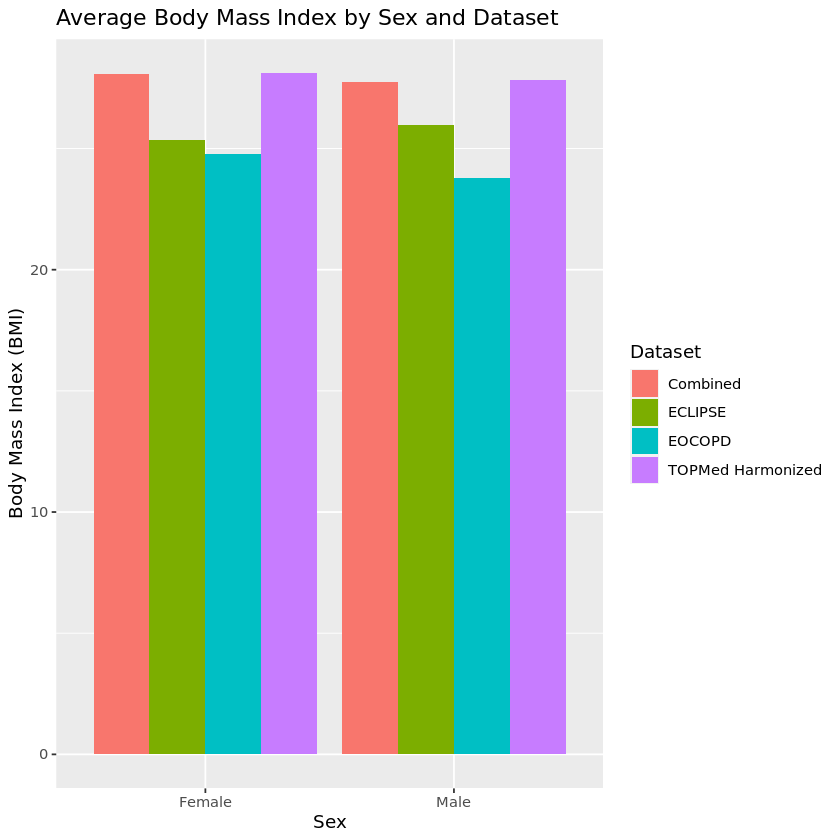

In [30]:
ggplot(data = to_plot, aes(fill=studies, y=total_means, x=sex)) + 
    geom_bar(position="dodge", stat="identity") +
    labs(title = "Average Body Mass Index by Sex and Dataset",
         x = "Sex", y = "Body Mass Index (BMI)",
         fill = "Dataset")

-----

### Orthopnea variables across studies
In this example, we will be harmonizing variables related to `orthopnea`. Orthopnea is shortness of breath that occurs when individuals lie flat. Because of this, people with orthopnea have to sleep propped up in bed or sitting in a chair. You can read more about this condition [here](https://www.sleepfoundation.org/sleep-apnea/orthopnea).

Let's start by doing a search in PIC-SURE for concept paths containing `orthopnea`.

In [31]:
ortho_dict <- bdc::find.in.dictionary(resource, "orthopnea") %>%
    bdc::extract.entries()
head(ortho_dict)

,categorical,observationCount,patientCount,name,min,max,HpdsDataType,categoryValues,description
,<lgl>,<int>,<int>,<chr>,<lgl>,<lgl>,<chr>,<list>,<lgl>
1,TRUE,7048,7048,\Framingham Cohort ( phs000007 )\Tests\ECG\DO YOU/HAVE YOU NEEDED TO SLEEP ON TWO OR MORE PILLOWS TO HELP YOU BREATH? (ORTHOPNEA)\,NA,NA,phenotypes,"NO , YES",NA
2,TRUE,4064,4064,\Framingham Cohort ( phs000007 )\Lab Work\Blood\Hematologic\DO YOU/HAVE YOU NEEDED TO SLEEP ON TWO OR MORE PILLOWS TO HELP YOU BREATH? (ORTHOPNEA)\,NA,NA,phenotypes,"NO , YES",NA
3,TRUE,288,288,"\Framingham Cohort ( phs000007 )\Clinic Questionnaire (Interview and Physical Exam)\Clinic Exam Questionnaire\MD Interview, Physical Exam, Examiner's Opinion, and Clinical Diagnostic Impression; Non-MD / Non-medical Interview / Self-report and Physical Exam / Anthropometrics / Observed Performance\Medical History - Respiratory Symptoms - Part II - Shortness of breath: Do you/have you needed to sleep on two or more pillows to help you breath? (Orthopnea)\",NA,NA,phenotypes,"No , Yes",NA
4,TRUE,379,379,"\Framingham Cohort ( phs000007 )\Clinic Questionnaire (Interview and Physical Exam)\Clinic Exam Questionnaire\MD Interview, Physical Exam, Examiner's Opinion, and Clinical Diagnostic Impression; Non-MD / Non-medical Interview / Self-report and Physical Exam / Anthropometrics / Observed Performance\ORTHOPNEA, RECENT\",NA,NA,phenotypes,"MAYBE, NO , YES",NA
5,TRUE,141,141,\Framingham Cohort ( phs000007 )\Tests\ECG\Medical History - Respiratory Symptoms: Do you/have you needed to sleep on two or more pillows to help you breathe (Orthopnea)? Variable appears on Form A only\,NA,NA,phenotypes,"No , Not applicable/ question not included in administered form, Yes",NA
6,TRUE,379,379,"\Framingham Cohort ( phs000007 )\Tests\Pulmonary Function Tests\ORTHOPNEA, RECENT\",NA,NA,phenotypes,"MAYBE, NO , YES",NA


As shown in the resulting dataframe, orthopnea is often recorded as a something like `sleep on two or more pillows to help you breathe?`

Let's do a search for `pillows` in PIC-SURE to explore those concept paths.

In [32]:
pillow_dict <- bdc::find.in.dictionary(resource, "pillows") %>%
    bdc::extract.entries()
tail(pillow_dict)

,categorical,observationCount,patientCount,name,min,max,HpdsDataType,categoryValues,description
,<lgl>,<int>,<int>,<chr>,<lgl>,<lgl>,<chr>,<list>,<lgl>
105,TRUE,141,141,"\Framingham Cohort ( phs000007 )\Clinic Questionnaire (Interview and Physical Exam)\Clinic Exam Questionnaire\MD Interview, Physical Exam, Examiner's Opinion, and Clinical Diagnostic Impression; Non-MD / Non-medical Interview / Self-report and Physical Exam / Anthropometrics / Observed Performance\Medical History - Respiratory Symptoms: Do you/have you needed to sleep on two or more pillows to help you breathe (Orthopnea)? Variable appears on Form A only\",NA,NA,phenotypes,"No , Not applicable/ question not included in administered form, Yes",NA
106,TRUE,280,280,"\Framingham Cohort ( phs000007 )\Clinic Questionnaire (Interview and Physical Exam)\Clinic Exam Questionnaire\MD Interview, Physical Exam, Examiner's Opinion, and Clinical Diagnostic Impression; Non-MD / Non-medical Interview / Self-report and Physical Exam / Anthropometrics / Observed Performance\Respiratory Disease Questionnaire - Tech Administered: When you are near animals, such as cats, dogs, horses, near feathers, including pillows, quilts, or in a dusty or moldy part of the house, do you ever - Get itching or watering eyes?\",NA,NA,phenotypes,"No , Yes",NA
107,TRUE,4429,4046,\Framingham Cohort ( phs000007 )\Tests\ECG\SLEEP ON 2 OR MORE PILLOWS TO HELP YOU BREATHE\,NA,NA,phenotypes,"NO , YES",NA
108,TRUE,2,2,\Framingham Cohort ( phs000007 )\Tests\ECG\Medical History - Respiratory Symptoms: Do you need (Have you needed) to sleep on two or more pillows to help you breathe (Orthopnea)?\,NA,NA,phenotypes,No,NA
109,TRUE,3093,2930,\Jackson Heart Study (JHS) Cohort ( phs000286 )\Do you sleep on 2 or more pillows to improve your breathing?\,NA,NA,phenotypes,"Don't know, No , Refused , Yes",NA
110,TRUE,280,280,"\Framingham Cohort ( phs000007 )\Tests\Ankle-arm Blood Pressure\Respiratory Disease Questionnaire - Tech Administered: When you are near animals, such as cats, dogs, horses, near feathers, including pillows, quilts, or in a dusty or moldy part of the house, do you ever - Start to wheeze?\",NA,NA,phenotypes,"No , Yes",NA


As shown in the resulting dataframe, there are some concept paths related to orthopnea that were not captured by the previous `orthopnea` search, such as `Do you sleep on 2 or more pillows to improve your breathing?` from the Jackson Heart Study (JHS) Cohort (phs000286). In fact, the JHS dataset was not returned at all when we searched for `orthopnea`. 

This is problematic for researchers studying these types of variables, since the concept paths of interest may not always be captured by a single search term. To account for this, researchers must conduct exploratory searches to determine potential search terms.

Let's say we want to harmonize orthopnea variables from the following datasets: FHS, MESA, and WHI. We can first get all concept paths in each study and then search for our terms of interest (`orthopnea` or `pillows`) to retrieve the concept paths of interest.

In [33]:
# Function that filters out variabels from a dataframe (df) that contain any of the terms (list_of_terms)
find_concept_paths <- function(study_name, list_of_terms){
    df <- bdc::find.in.dictionary(resource, study_name) %>%
        bdc::extract.entries()
    if(length(list_of_terms)>1){
        pattern <- paste(list_of_terms, collapse='|')
    } else {
        pattern <- list_of_terms
    }
    pattern <- paste(c('(', pattern, ')'), collapse = '')
    df_filtered <- df %>%
        filter(grepl(pattern, name, ignore.case=TRUE))
    vars_list <- list(df_filtered$name)[[1]]
    return(vars_list)
}

In [34]:
ortho_terms = c('orthopnea', 'pillows')

In [35]:
mesa <- find_concept_paths('Multi-Ethnic Study of Atherosclerosis (MESA) SHARe ( phs000209 )', ortho_terms)
#mesa # Uncomment to view full results list
mesa_var <- mesa[1]
mesa_var

[1] "\\Multi-Ethnic Study of Atherosclerosis (MESA) SHARe ( phs000209 )\\SLEEP ON TWO OR MORE PILLOWS TO HELP BREATHE\\"

In [36]:
whi <- find_concept_paths("Women's Health Initiative Clinical Trial and Observational Study ( phs000200 )", ortho_terms)
#whi # Uncomment to view full results list
whi_var <- whi[1]
whi_var

[1] "\\Women's Health Initiative Clinical Trial and Observational Study ( phs000200 )\\UNC Heart Failure Details (Main, Ext1, Ext2)\\F136 Orthopnea\\"

In [37]:
fhs <- find_concept_paths("Framingham Cohort ( phs000007 )", ortho_terms)
#fhs # Uncomment to view full results list
fhs_var <- fhs[38]
fhs_var

[1] "\\Framingham Cohort ( phs000007 )\\Clinic Questionnaire (Interview and Physical Exam)\\Clinic Exam Questionnaire\\MD Interview, Physical Exam, Examiner's Opinion, and Clinical Diagnostic Impression; Non-MD / Non-medical Interview / Self-report and Physical Exam / Anthropometrics / Observed Performance\\DO YOU/HAVE YOU NEEDED TO SLEEP ON TWO OR MORE PILLOWS TO HELP YOU BREATH? (ORTHOPNEA)\\"

As part of our research, let's say we are interested in exploring the relationship between pneumonia and orthopnea. Let's save concept paths related to `pneumonia` as well. 

In [38]:
mesa_pneu <- find_concept_paths('Multi-Ethnic Study of Atherosclerosis (MESA) SHARe ( phs000209 )', c('pneumonia'))
#mesa_pneu # Uncomment to view full results list
mesa_pneu_var <- mesa_pneu[5]
mesa_pneu_var

[1] "\\Multi-Ethnic Study of Atherosclerosis (MESA) SHARe ( phs000209 )\\MESA Lung Spirometry Dataset: The MESA Lung Spirometry Exam is an ancillary exam of the MESA Study. This dataset consists of spirometry phenotype variables including, but not limited to FEF, FVC, FEV, FEV%, FET and PEF and subject phenotype variables including sociodemography, anthropometry, family medical history, medications, inhalation exposures, smoking status, and respiratory signs, symptoms and diseases.\\TIMES WITH PNEUMONIA\\"

In [39]:
whi_pneu <- find_concept_paths("Women's Health Initiative Clinical Trial and Observational Study ( phs000200 )", c('pneumonia'))
# whi_pneu # Uncomment to view full results list
whi_pneu_var <- whi_pneu[1]
whi_pneu_var

[1] "\\Women's Health Initiative Clinical Trial and Observational Study ( phs000200 )\\Form 156 - Eating Habits Supplemental Questionnaire (Ext2)\\Pneumonia diagnosed by a physician\\"

In [40]:
fhs_pneu <- find_concept_paths("Framingham Cohort ( phs000007 )", c('pneumonia'))
# fhs_pneu # Uncomment to view full results
fhs_pneu_var <- fhs_pneu[27]
fhs_pneu_var

[1] "\\Framingham Cohort ( phs000007 )\\Validated / Reviewed / Scored / Abstracted Data\\Exam Dates, Age, Sex\\CDI: PNEUMONIA\\"

Now that we know and have saved our concept paths of interest, we can use these to build our queries and obtain our dataframes. 

In [41]:
mesa_query <- bdc::new.query(resource = resource)
bdc::query.anyof.add(query = mesa_query,
                     keys =  mesa_var)
bdc::query.require.add(query = mesa_query,
                     keys =  mesa_pneu_var)
mesa_results <- bdc::query.run(mesa_query, result.type = 'dataframe')

In [42]:
fhs_query <- bdc::new.query(resource = resource)
bdc::query.anyof.add(query = fhs_query,
                     keys =  fhs_var)
bdc::query.require.add(query = fhs_query,
                     keys =  fhs_pneu_var)
fhs_results <- bdc::query.run(fhs_query, result.type = 'dataframe')

In [43]:
whi_query <- bdc::new.query(resource = resource)
bdc::query.anyof.add(query = whi_query,
                     keys =  whi_var)
bdc::query.require.add(query = whi_query,
                     keys =  whi_pneu_var)
whi_results <- bdc::query.run(whi_query, result.type = 'dataframe')

Now that we have our patient-level dataframes, we can combine them into a single, cohesive dataframe.

The following function accomplishes three main tasks:
1. Removes extra columns, such as consent information
2. Renames the Pneumonia and Orthopnea columns
3. Adds the Dataset column, which corresponds to the study

In [44]:
clean_up_df2 <- function(df, study){
    columns_to_drop <- c('\\_Parent Study Accession with Subject ID\\', '\\_Topmed Study Accession with Subject ID\\', '\\_consents\\', '\\_harmonized_consent\\')
    df1 <- df[,!(names(df) %in% columns_to_drop)]
    if(grepl('pneumonia', names(df1)[2], ignore.case=TRUE)){
        names(df1)[2] <- 'Pneumonia'
        names(df1)[3] <- 'Orthopnea'
    } else {
        names(df1)[2] <- "Orthopnea"
        names(df1)[3] <- "Pneumonia"
    }
    df1$Dataset <- study
    return(df1)
}

In [45]:
clean_fhs <- clean_up_df2(fhs_results, 'FHS')
clean_whi <- clean_up_df2(whi_results, 'WHI')
clean_mesa <- clean_up_df2(mesa_results, 'MESA')

As you may have noticed, the orthopnea and pneumonia variables are encoded differently between these studies. Specifically:
- In FHS, pneumonia is recorded as "NO", "MAYBE", or "YES"
- In MESA, pneumonia is recorded as "Yes", "No", or "Don't know / Not sure"
- In WHI, pneumonia is recoded as a value, or the number of times a participant has been diagnosed with pneumonia

To harmonize these variables, we need to create a consistent encoding across these studies. 

In [46]:
# Combine results for the pneumonia and orthopnea variables
pneumonia_results <- c(unique(clean_fhs$Pneumonia), 
                       unique(clean_whi$Pneumonia),
                       unique(clean_mesa$Pneumonia))
orthopnea_results <- c(unique(clean_fhs$Orthopnea), 
                       unique(clean_whi$Orthopnea),
                       unique(clean_mesa$Orthopnea))
raw <- c(pneumonia_results, orthopnea_results)
#pneumonia_results # Uncomment to view values
#orthopnea_results # Uncomment to view values

The following code creates these mappings:

|Raw value|Harmonized value|
|---|---|
|No|0|
|NO|0|
|No/Not recorded|0|
|Numeric value equal to 0|0|
|MAYBE|2|
|Don't know / Not sure|2|
|DO NOT KNOW|2|
|YES|1|
|Yes|1|
|Numeric value greater than 0|1|

In [47]:
# Function to create mapping
create_mappings <- function(raw){
    if_else(raw %in% c("NO", "no", "No", "No//Not Recorded"), 0,
            if_else(raw %in% c("YES", "Yes", "yes"), 1,
                    if_else(raw %in% c("MAYBE", 'DO NOT KNOW', "Don't know / Not sure"), 2,
                            if_else(raw == 0, 0, 1))))
}


In [48]:
final_df <- rbind(clean_whi, clean_mesa, clean_fhs) %>%
    mutate(Pneumonia = create_mappings(Pneumonia),
           Orthopnea = create_mappings(Orthopnea))
head(final_df)

,Patient ID,Pneumonia,Orthopnea,Dataset
,<int>,<dbl>,<dbl>,<chr>
1,436586,1,1,WHI
2,436691,0,1,WHI
3,436776,0,1,WHI
4,436930,0,1,WHI
5,436939,1,1,WHI
6,437029,0,1,WHI


Now that the variables have been encoded in the same way, we can use this dataframe for analysis and visualizations. 

In [49]:
#library
install.packages("BiocManager")
BiocManager::install("limma")
library(limma)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'limma'”
Old packages: 'fansi', 'googlesheets4', 'ipred', 'later', 'pryr', 'reticulate',
  'xfun'



In [50]:
# Filters to apply to the final_df to create figure
fhs <- final_df$Dataset == "FHS"
mesa <- final_df$Dataset == 'MESA'
whi <- final_df$Dataset == "WHI"

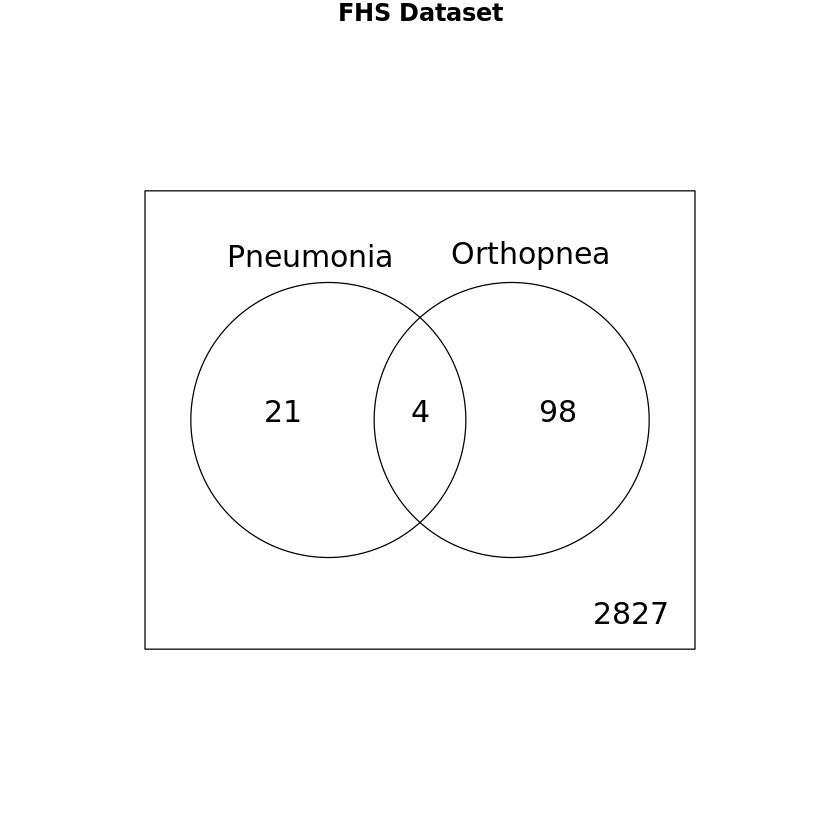

In [51]:
fhs_subset <- as.matrix(final_df[fhs, c('Pneumonia', 'Orthopnea')])
vennDiagram(vennCounts(fhs_subset), main='FHS Dataset')

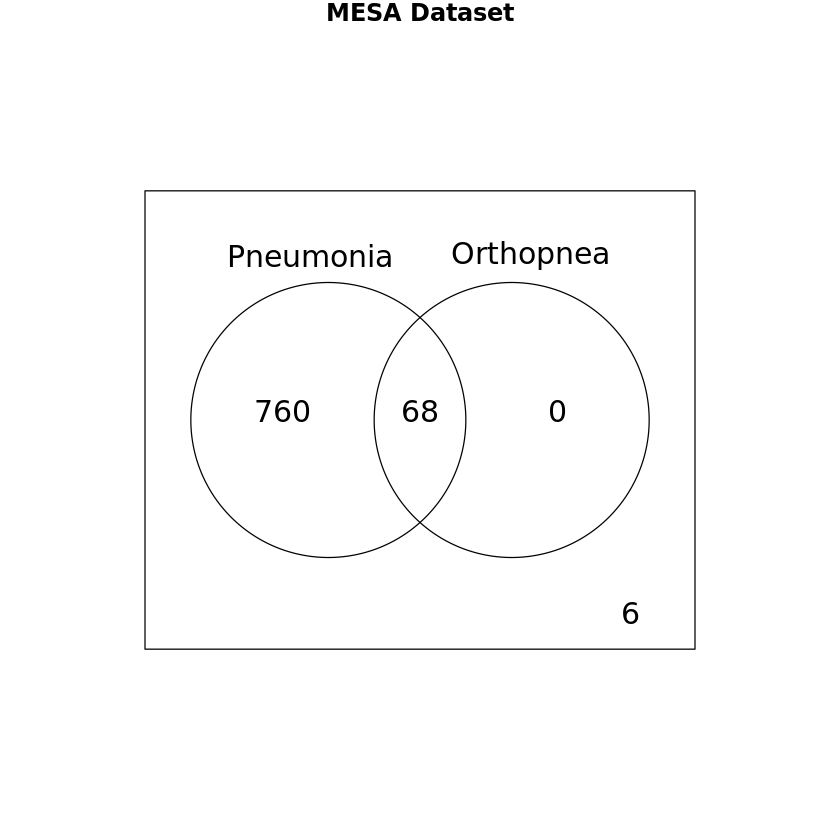

In [52]:
mesa_subset <- as.matrix(final_df[mesa, c('Pneumonia', 'Orthopnea')])
vennDiagram(vennCounts(mesa_subset), main="MESA Dataset")

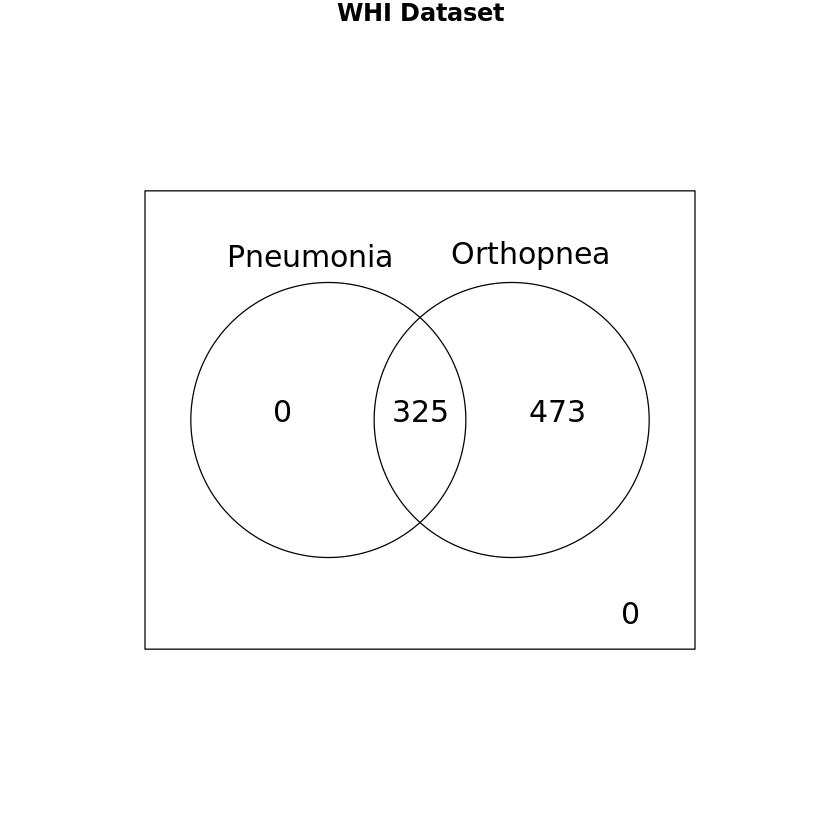

In [53]:
whi_subset <- as.matrix(final_df[whi, c('Pneumonia', 'Orthopnea')])
vennDiagram(vennCounts(whi_subset), main='WHI Dataset')

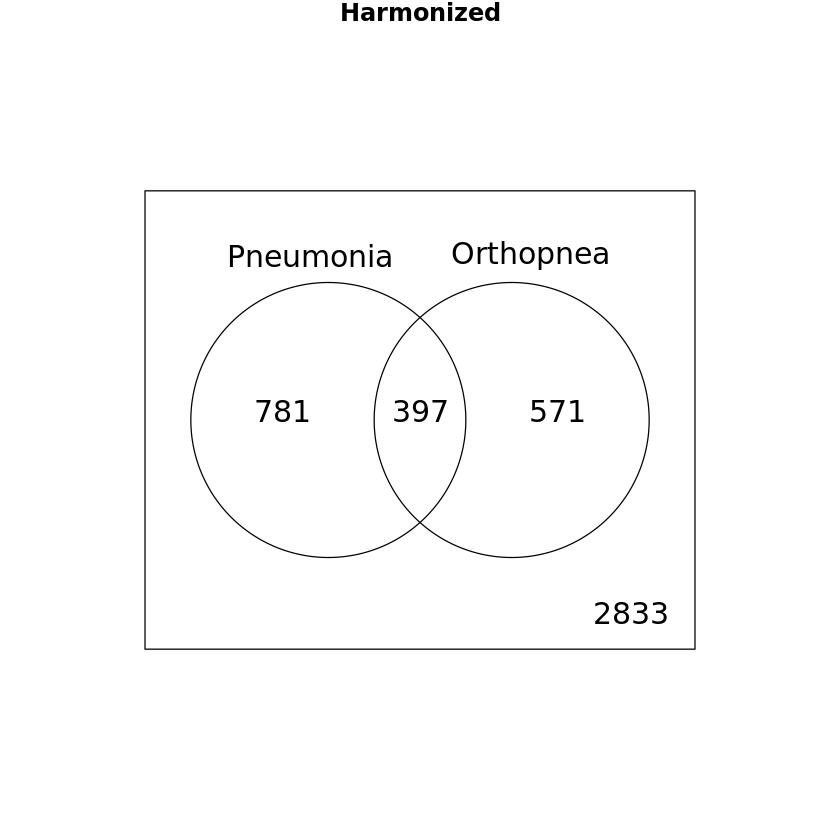

In [54]:
sub <- as.matrix(final_df[, c('Pneumonia', 'Orthopnea')])
v <- vennDiagram(vennCounts(sub), main='Harmonized')